#Importing library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
import torch
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torch.utils import data as D
import torch
from PIL import Image
import os
import glob
import os.path as osp

#Mount Drive

In [2]:
from google.colab import drive;
drive.mount("/content/drive");

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/4.2 Files/Soft Computing/Assignment 2/training-a.csv");
print(df.head(5));

     filename           original filename  ...  contributing team  database name
0  a00000.png   Scan_58_digit_5_num_8.png  ...       Buet_Broncos     training-a
1  a00001.png   Scan_73_digit_3_num_5.png  ...       Buet_Broncos     training-a
2  a00002.png   Scan_18_digit_1_num_3.png  ...       Buet_Broncos     training-a
3  a00003.png  Scan_166_digit_7_num_3.png  ...       Buet_Broncos     training-a
4  a00004.png  Scan_108_digit_0_num_1.png  ...       Buet_Broncos     training-a

[5 rows x 7 columns]


## Droping columns except filename and digit

In [4]:
modified_df = df.drop(df.iloc[:,1:3],axis = 1);
modified_df = modified_df.drop(modified_df.iloc[:,2:],axis = 1);
print(modified_df);
print(len(modified_df));

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
19702


## Dataset custom loader


In [5]:
path = '/content/drive/MyDrive/4.2 Files/Soft Computing/Assignment 2/training-a'

In [ ]:
batch_size = 20;
num_iters = 20000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 6;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


#dataset preprocessing

In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

#Normalize

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(45),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

#Train Test split

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.8 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(train_dataset);
print(test_dataset);

19702
15761
3941


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  



#Using Tanh ( hyperbolic tangent activation function)

In [ ]:
import torch.nn as nn;
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 2nd hidden layer
        self.linear_2 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 3rd hidden layer
        self.linear_3 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 4th hidden layer
        self.linear_4 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 5th hidden layer
        self.linear_5 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 6th hidden layer
        self.linear_6 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_2(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_3(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_4(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_5(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_6(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

In [ ]:

model = NeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)

#loss optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#train model

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.4283580780029297. Accuracy: 10.555696523724944
Iteration: 1000. Loss: 2.2547607421875. Accuracy: 13.169246384166454
Iteration: 1500. Loss: 2.114727258682251. Accuracy: 14.640954072570414
Iteration: 2000. Loss: 2.2805542945861816. Accuracy: 18.47246891651865
Iteration: 2500. Loss: 2.2017154693603516. Accuracy: 19.462065465617865
Iteration: 3000. Loss: 1.9450263977050781. Accuracy: 15.630550621669627
Iteration: 3500. Loss: 2.2626495361328125. Accuracy: 19.79193098198427
Iteration: 4000. Loss: 2.107870578765869. Accuracy: 19.842679522963714
Iteration: 4500. Loss: 2.1521270275115967. Accuracy: 17.178381121542756
Iteration: 5000. Loss: 2.064502000808716. Accuracy: 15.42755645775184
Iteration: 5500. Loss: 2.095858573913574. Accuracy: 22.811469170261354
Iteration: 6000. Loss: 2.2459499835968018. Accuracy: 19.36056838365897
Iteration: 6500. Loss: 1.9990003108978271. Accuracy: 24.56229383405227
Iteration: 7000. Loss: 2.0259270668029785. Accuracy: 22.30398376046689
Iterat

In [66]:
loss_exp1 = [2.4283580780029297,2.2547607421875,2.114727258682251,2.2805542945861816,2.2017154693603516,1.9450263977050781,2.2626495361328125,2.107870578765869,
             2.1521270275115967,2.064502000808716,2.095858573913574,2.2459499835968018,1.9990003108978271,2.0259270668029785,2.106254816055298,1.9989612102508545,
             1.7513080835342407,2.0579781532287598,1.9795935153961182,1.7366281747817993,2.0384554862976074,1.951392412185669,2.0176470279693604,2.0768845081329346,
             2.111814022064209,1.8859691619873047,1.941522240638733,1.9412027597427368,2.102806329727173,1.6819206476211548,1.9592771530151367,2.01918625831604,
             1.9612171649932861,1.9719295501708984,2.0191917419433594,1.8199735879898071,1.7522602081298828,2.168506622314453,2.321964979171753];
print(len(loss_exp1));

39


##Batch=50

In [ ]:
batch_size = 50;
num_iters = 30000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.8 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(len(train_dataset));
print(len(test_dataset));


19702
15761
3941
15761
3941


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(len(train_loader));
print(len(test_loader));

316
79


In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


In [ ]:
# INSTANTIATE MODEL CLASS
 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.0834006071090698. Accuracy: 64.65364120781527
Iteration: 1000. Loss: 0.702028751373291. Accuracy: 62.92819081451408
Iteration: 1500. Loss: 0.8992939591407776. Accuracy: 67.26719106825679
Iteration: 2000. Loss: 0.8857229351997375. Accuracy: 57.57421974118244
Iteration: 2500. Loss: 1.2328885793685913. Accuracy: 60.61913219994925
Iteration: 3000. Loss: 0.6588881611824036. Accuracy: 65.92235473230144
Iteration: 3500. Loss: 0.7187374830245972. Accuracy: 68.58665313372241
Iteration: 4000. Loss: 0.7048249840736389. Accuracy: 69.67774676478051
Iteration: 4500. Loss: 0.8827683329582214. Accuracy: 65.41486932250697
Iteration: 5000. Loss: 0.6872447729110718. Accuracy: 66.15072316670896
Iteration: 5500. Loss: 0.9345237016677856. Accuracy: 62.47145394569906
Iteration: 6000. Loss: 0.8359250426292419. Accuracy: 63.99391017508247
Iteration: 6500. Loss: 0.9958611130714417. Accuracy: 68.10454199441766
Iteration: 7000. Loss: 0.6835382580757141. Accuracy: 69.85536665820858
Iteratio

In [87]:
loss_exp2 = [1.0834006071090698,0.702028751373291,0.8992939591407776,0.8857229351997375,1.2328885793685913,0.6588881611824036,0.7187374830245972,
             0.7048249840736389,0.8827683329582214,0.6872447729110718,0.9345237016677856,0.8359250426292419, 0.9958611130714417,0.6835382580757141,
             0.8281465172767639,0.7428023815155029,0.7334104776382446,0.655303955078125,0.9008578658103943,0.7751531004905701,0.7628228068351746,
             0.5974658727645874, 0.6093656420707703,0.44996628165245056,0.8790664672851562,1.1590827703475952,0.49693557620048523,0.9975172281265259,
             0.6551029086112976,0.8672613501548767,0.8021856546401978,0.814137876033783,0.7533636689186096, 0.8716011643409729,1.5936181545257568, 0.574654221534729,
             0.5856778025627136,0.39834487438201904,0.7162597179412842,0.5291657447814941,0.9734000563621521,0.5509054660797119,0.6647824645042419,0.6828736662864685,
             0.5193291902542114,0.639786958694458,0.46665820479393005,0.5822591185569763,0.3710491955280304,0.8607273697853088,0.7410449981689453,0.5600713491439819,
             0.3397899866104126,0.4503566026687622,0.952993631362915,0.4127630591392517,0.7307774424552917,0.6913223266601562,0.6966129541397095,0.5731313228607178
             ];
print(len(loss_exp2));

60


In [88]:
iterations = list(range(500,30500,500));
print(len(iterations));

60


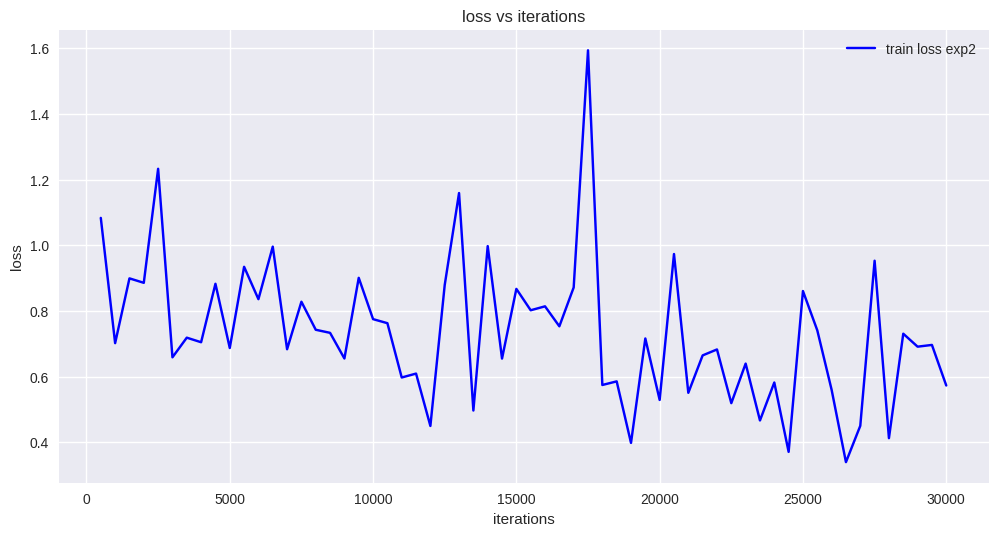

In [43]:
plt.figure(figsize=(12,6),dpi=100);
plt.style.use('seaborn');
plt.plot(iterations , loss_exp2, color='blue',label='train loss exp2');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

#Batch=100

In [ ]:
batch_size = 100;
num_iters = 30000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 4;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.7 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(len(train_dataset));
print(len(test_dataset));


19702
13791
5911
13791
5911


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(len(train_loader));
print(len(test_loader));

138
60


In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


In [ ]:
# INSTANTIATE MODEL CLASS
 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2940142154693604. Accuracy: 11.977668753172052
Iteration: 1000. Loss: 2.2842512130737305. Accuracy: 13.161901539502622
Iteration: 1500. Loss: 2.219125747680664. Accuracy: 17.949585518524785
Iteration: 2000. Loss: 2.1919546127319336. Accuracy: 14.092370157333784
Iteration: 2500. Loss: 2.2441840171813965. Accuracy: 22.48350532904754
Iteration: 3000. Loss: 2.1472442150115967. Accuracy: 22.61884621891389
Iteration: 3500. Loss: 2.030827045440674. Accuracy: 27.372694975469464
Iteration: 4000. Loss: 1.843222975730896. Accuracy: 29.216714599898495
Iteration: 4500. Loss: 1.9519935846328735. Accuracy: 23.380138724412113
Iteration: 5000. Loss: 1.7795361280441284. Accuracy: 37.26949754694637
Iteration: 5500. Loss: 2.021439790725708. Accuracy: 35.611571646083576
Iteration: 6000. Loss: 1.9602138996124268. Accuracy: 33.09084757232279
Iteration: 6500. Loss: 1.8224235773086548. Accuracy: 34.511926915919474
Iteration: 7000. Loss: 1.6798664331436157. Accuracy: 39.925562510573506
I

In [50]:
loss_exp3 = [2.2940142154693604,2.2842512130737305,2.219125747680664,2.1919546127319336,2.2441840171813965,2.1472442150115967,2.030827045440674,1.843222975730896,1.9519935846328735,
             1.7795361280441284,2.021439790725708,1.9602138996124268,1.8224235773086548,1.6798664331436157,1.6798664331436157,1.6798664331436157,1.5650603771209717,1.5341306924819946,1.4682552814483643,1.6348248720169067,
             1.366936445236206,2.0265157222747803,1.4569393396377563,1.5158371925354004,1.2908817529678345,1.268243432044983,1.3049174547195435,1.1819819211959839,1.3068008422851562,1.1819819211959839,1.3068008422851562,
             1.1688286066055298,1.259798526763916,1.1806145906448364,1.2663969993591309,1.1062334775924683,1.120582938194275,0.9207834601402283,1.1116057634353638,0.963106095790863,1.0741379261016846,1.0561459064483643,
             1.0965666770935059,1.1008743047714233,1.0302320718765259,0.9794403314590454

             ];
print(len(loss_exp3));

46


In [53]:
iterations = list(range(500,23500,500));
print(len(iterations));

46


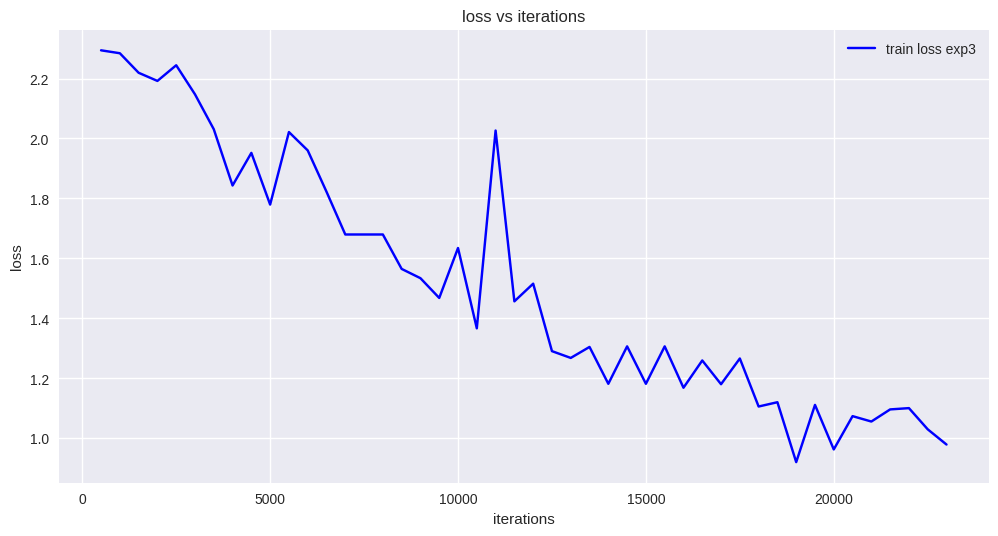

In [55]:
plt.figure(figsize=(12,6),dpi=100);
plt.style.use('seaborn');
plt.plot(iterations , loss_exp3, color='blue',label='train loss exp3');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

#Batch=250, Relu, Iteration=30k

In [ ]:
batch_size = 270;
num_iters = 30000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cuda:0


In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

##Normalizing 

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

##Train Test Split

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.8 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(len(train_dataset));
print(len(test_dataset));


19702
15761
3941
15761
3941


##Dataloader

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(len(train_loader));
print(len(test_loader));

59
15


In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()

        # self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        # self.relu_4 = nn.ReLU()

        # self.linear_5 = nn.Linear(num_hidden, num_hidden)
        
        # self.relu_5 = nn.ReLU()

        # self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        # self.relu_6 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 2nd hidden layer
        # out = self.relu_4(out)

        # ### 5th hidden layer
        # out  = self.linear_5(out)
        # ### Non-linearity in 2nd hidden layer
        # out = self.relu_5(out)

        # ### 6th hidden layer
        # out  = self.linear_6(out)
        # ### Non-linearity in 2nd hidden layer
        # out = self.relu_6(out)
 

        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


#INSTANTIATE MODEL CLASS

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

# INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.27030348777771. Accuracy: 17.05150976909414
Iteration: 1000. Loss: 2.1378073692321777. Accuracy: 26.92210098959655
Iteration: 1500. Loss: 1.9998058080673218. Accuracy: 15.935041867546309
Iteration: 2000. Loss: 2.004992723464966. Accuracy: 28.85054554681553
Iteration: 2500. Loss: 1.8416515588760376. Accuracy: 20.680030449124587
Iteration: 3000. Loss: 1.8034420013427734. Accuracy: 36.41207815275311
Iteration: 3500. Loss: 1.7340449094772339. Accuracy: 34.8896219233697
Iteration: 4000. Loss: 1.8096699714660645. Accuracy: 36.53894950520173
Iteration: 4500. Loss: 1.6913446187973022. Accuracy: 39.50773915249937
Iteration: 5000. Loss: 1.528908133506775. Accuracy: 43.288505455468155
Iteration: 5500. Loss: 1.5557454824447632. Accuracy: 40.218218726211624
Iteration: 6000. Loss: 1.3876230716705322. Accuracy: 47.196143110885565
Iteration: 6500. Loss: 1.485954761505127. Accuracy: 45.3945699061152
Iteration: 7000. Loss: 1.656793236732483. Accuracy: 45.62293834052271
Iteration:

In [61]:
loss_exp4 =[2.2842512130737305,2.1378073692321777,1.9998058080673218,2.004992723464966,1.8416515588760376,1.8034420013427734,1.7340449094772339,1.8096699714660645,1.6913446187973022,
              1.528908133506775,1.5557454824447632,1.3876230716705322,1.485954761505127,1.656793236732483,1.4403197765350342,1.8016724586486816,1.4564579725265503,1.2463114261627197,
              1.145046353340149,1.4336763620376587,1.2557017803192139,1.1539775133132935,1.1699450016021729,0.9804643392562866,1.0662434101104736,0.9536813497543335,0.9977675676345825,1.1430015563964844];
print(len(loss_exp4))

28


In [62]:
iterations = list(range(500,14500,500));
print(len(iterations));

28


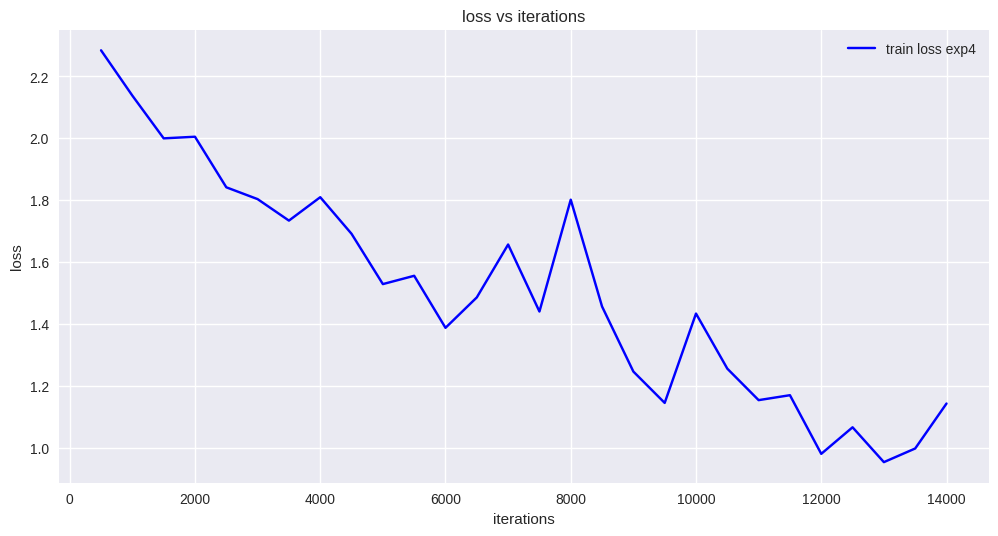

In [63]:
plt.figure(figsize=(12,6),dpi=100);
plt.style.use('seaborn');
plt.plot(iterations , loss_exp4, color='blue',label='train loss exp4');

plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

In [89]:
iterations = list(range(500,30500,500));
print(len(iterations));

60


#Loss vs Iteration

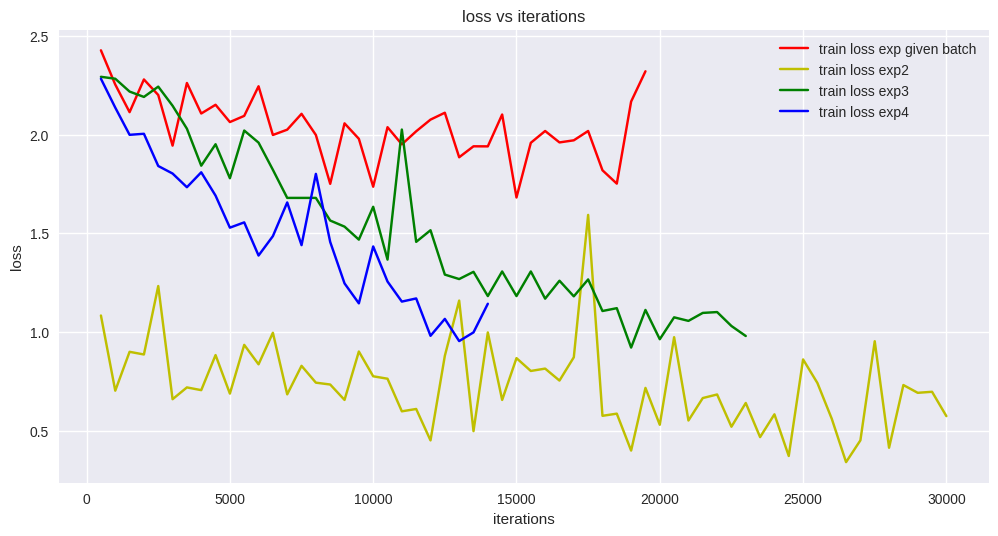

In [90]:
plt.figure(figsize=(12,6),dpi=100);
plt.style.use('seaborn');
plt.plot(iterations[0:39] , loss_exp1, color='red',label='train loss exp given batch');
plt.plot(iterations[0:60] , loss_exp2, color='y',label='train loss exp2');
plt.plot(iterations[0:46] , loss_exp3, color='g',label='train loss exp3');
plt.plot(iterations[0:28] , loss_exp4, color='b',label='train loss exp4');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

## Dataset 2

In [182]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math;
from matplotlib.pyplot import imshow

In [183]:
train_df = pd.read_csv("/content/drive/MyDrive/4.2 Files/Soft Computing/Assignment 2/Dataset_2/verification_train.csv");
print(df.head(5));

     filename           original filename  ...  contributing team  database name
0  a00000.png   Scan_58_digit_5_num_8.png  ...       Buet_Broncos     training-a
1  a00001.png   Scan_73_digit_3_num_5.png  ...       Buet_Broncos     training-a
2  a00002.png   Scan_18_digit_1_num_3.png  ...       Buet_Broncos     training-a
3  a00003.png  Scan_166_digit_7_num_3.png  ...       Buet_Broncos     training-a
4  a00004.png  Scan_108_digit_0_num_1.png  ...       Buet_Broncos     training-a

[5 rows x 7 columns]


In [184]:
test_df = pd.read_csv("/content/drive/MyDrive/4.2 Files/Soft Computing/Assignment 2/Dataset_2/verification_test.csv");
print(df.head(5));

     filename           original filename  ...  contributing team  database name
0  a00000.png   Scan_58_digit_5_num_8.png  ...       Buet_Broncos     training-a
1  a00001.png   Scan_73_digit_3_num_5.png  ...       Buet_Broncos     training-a
2  a00002.png   Scan_18_digit_1_num_3.png  ...       Buet_Broncos     training-a
3  a00003.png  Scan_166_digit_7_num_3.png  ...       Buet_Broncos     training-a
4  a00004.png  Scan_108_digit_0_num_1.png  ...       Buet_Broncos     training-a

[5 rows x 7 columns]


4
784
28
Label: 4


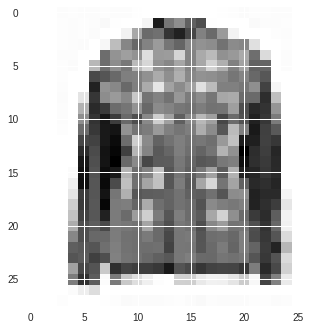

In [185]:
i = 5 # set any valid index of an image
label = train_df.values[i][0] # retrieving label from first colum in dataframe
print(label)
im_buf = train_df.values[i][1:] # creating flat array of given image
print(len(im_buf)); 
axis_len = int(math.sqrt(im_buf.shape[0])) # calculating the dimensions of the square image
print(axis_len);
im_array = np.int8(np.reshape(im_buf, (axis_len, axis_len))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)

print(f'Label: {label}')
imshow(np.asarray(img))


In [186]:
train_df['pixel12'] = train_df['pixel12'] / 255; #Normalizing

In [187]:
test_label=test_df['label']
train_label=train_df['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)
print(all_labels);

0        0
1        1
2        2
3        2
4        3
        ..
69995    9
69996    1
69997    8
69998    8
69999    7
Name: label, Length: 70000, dtype: int64


In [189]:
data_name=[test_df,train_df]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)


In [190]:
all_image=all_image/255.0
all_image=all_image.values.reshape(-1,28,28,1)

0


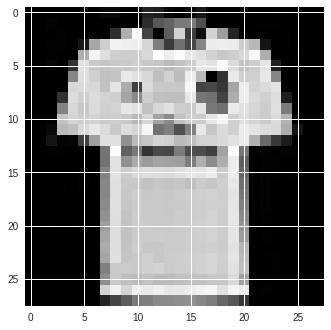

In [191]:
show_img = all_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(all_labels[0])

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)

In [193]:
train_dataset_zipped = list(zip(X_train,y_train))
test_dataset_zipped = list(zip(X_test,y_test))
print(len(train_dataset_zipped))
print(len(test_dataset_zipped))


56000
14000


In [194]:
batch_size = 20;
num_iters = 20000;
input_dim = 28*28; #num_features = 784
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 6;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cuda:0


In [195]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

2800
700


In [196]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
         
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_6 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [197]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [198]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [199]:
Iteration_loss =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2835683822631836. Accuracy: 9.92142857142857
Iteration: 1000. Loss: 2.2879674434661865. Accuracy: 9.92142857142857
Iteration: 1500. Loss: 2.2992453575134277. Accuracy: 20.84285714285714
Iteration: 2000. Loss: 2.2944750785827637. Accuracy: 12.735714285714286
Iteration: 2500. Loss: 2.221580982208252. Accuracy: 20.785714285714285
Iteration: 3000. Loss: 1.8312244415283203. Accuracy: 23.021428571428572
Iteration: 3500. Loss: 1.4372141361236572. Accuracy: 45.35
Iteration: 4000. Loss: 1.0781654119491577. Accuracy: 64.60714285714286
Iteration: 4500. Loss: 0.8007211685180664. Accuracy: 67.16428571428571
Iteration: 5000. Loss: 0.9538942575454712. Accuracy: 66.15714285714286
Iteration: 5500. Loss: 0.6379300951957703. Accuracy: 73.19285714285714
Iteration: 6000. Loss: 0.8915907740592957. Accuracy: 69.17142857142858
Iteration: 6500. Loss: 0.6067347526550293. Accuracy: 76.67857142857143
Iteration: 7000. Loss: 0.47185954451560974. Accuracy: 76.10714285714286
Iteration: 7500. L

#Custom Parameters

In [200]:
batch_size = 230;
num_iters = 30000;
input_dim = 28*28; #num_features = 784
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cuda:0


In [201]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

244
61


In [202]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [203]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [204]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [205]:
Iteration_loss1 =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss1.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8349835872650146. Accuracy: 43.357142857142854
Iteration: 1000. Loss: 0.9351196885108948. Accuracy: 63.392857142857146
Iteration: 1500. Loss: 0.750800371170044. Accuracy: 71.01428571428572
Iteration: 2000. Loss: 0.6813692450523376. Accuracy: 74.71428571428571
Iteration: 2500. Loss: 0.5919386744499207. Accuracy: 75.75
Iteration: 3000. Loss: 0.5852774977684021. Accuracy: 79.12142857142857
Iteration: 3500. Loss: 0.4801918566226959. Accuracy: 80.62857142857143
Iteration: 4000. Loss: 0.487911581993103. Accuracy: 81.25714285714285
Iteration: 4500. Loss: 0.5668215155601501. Accuracy: 81.95714285714286
Iteration: 5000. Loss: 0.47284549474716187. Accuracy: 82.59285714285714
Iteration: 5500. Loss: 0.5908993482589722. Accuracy: 82.97142857142858
Iteration: 6000. Loss: 0.49229761958122253. Accuracy: 83.33571428571429
Iteration: 6500. Loss: 0.4608667492866516. Accuracy: 82.30714285714286
Iteration: 7000. Loss: 0.487312376499176. Accuracy: 83.36428571428571
Iteration: 7500. L

In [220]:
iterations = list(range(500,30500,500));
print(len(iterations));


60


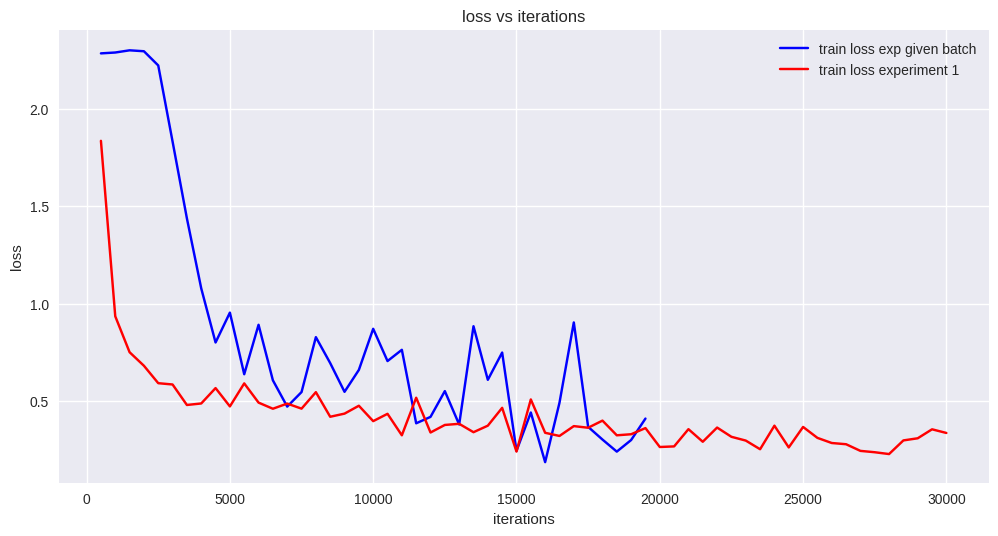

In [223]:
plt.figure(figsize=(12,6),dpi=100);
plt.style.use('seaborn');
plt.plot(iterations[0:39] , Iteration_loss, color='blue',label='train loss exp given batch');
plt.plot(iterations[0:60] , Iteration_loss1, color='red',label='train loss experiment 1');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True);
plt.legend();
plt.show()